In [1]:
#https://github.com/olgaliak/detection-amlworkbench/tree/master/assets
#!wget https://olgalicodestory.blob.core.windows.net/kittiwakedata/kittiwake_labled.zip
#!unzip kittiwake_labled.zip
#!rm kittiwake_labled.zip

In [20]:
import os
import glob
import json
import numpy as np
import torchvision
import torch
from PIL import Image
from torch.utils.data import Dataset
# Bit messy to use chainercv to visualise ...
from chainercv.visualizations import vis_bbox  # todo

In [3]:
PATH = "kittiwake_labled/"

In [58]:
with open(os.path.join(PATH, "train.json"), 'r') as annofile:
    labels = json.load(annofile) 

In [60]:
#labels['visitedFrames']

In [54]:
class BirdsData(Dataset):
    
    def __init__(self, img_dir, lbl_file, transform=None):
        self.img_locs = glob.glob(os.path.join(img_dir, "*.JPG"))
        with open(lbl_file, 'r') as annofile:
            self.labels = json.load(annofile) 
        self.transform = transform
        print("Loaded {} images".format(len(self.img_locs)))
        
    def __getitem__(self, idx):
        im_file = self.img_locs[idx]
        #print(im_file, idx)
        # BBoxes fixed to w=1269,h=952
        # Resized before transform to match label
        im_rgb = Image.open(im_file).resize((1269, 952))
        # Bounding boxes: (y_{min}, x_{min}, y_{max}, x_{max}
        img_no = str(int(os.path.basename(
            os.path.splitext(im_file)[0])))
        labels = self.labels['frames'][img_no]
        boxes = np.array([
            (l['y1'], l['x1'], l['y2'], l['x2']) for l in labels])
        if self.transform is not None:
            im_rgb = self.transform(im_rgb)
        return im_rgb, torch.FloatTensor(boxes)
        
    def __len__(self):
        return len(self.img_locs)

In [55]:
# Init dataset
train_dataset = BirdsData(
    img_dir = os.path.join(PATH, "train"),
    lbl_file = os.path.join(PATH, "train.json"))

Loaded 160 images


kittiwake_labled/train/090.JPG 5
kittiwake_labled/train/046.JPG 16
kittiwake_labled/train/083.JPG 24
kittiwake_labled/train/131.JPG 25
kittiwake_labled/train/115.JPG 26
kittiwake_labled/train/014.JPG 27
kittiwake_labled/train/098.JPG 33
kittiwake_labled/train/153.JPG 36
kittiwake_labled/train/061.JPG 46
kittiwake_labled/train/009.JPG 96
kittiwake_labled/train/075.JPG 97
kittiwake_labled/train/026.JPG 139
kittiwake_labled/train/003.JPG 131
kittiwake_labled/train/067.JPG 141


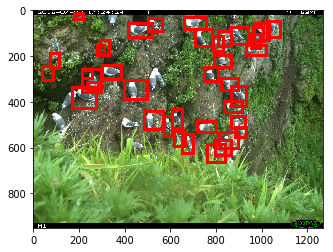

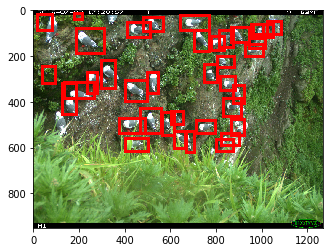

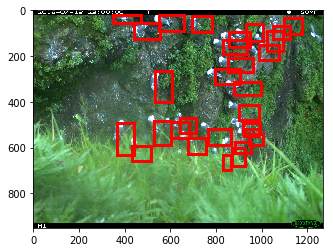

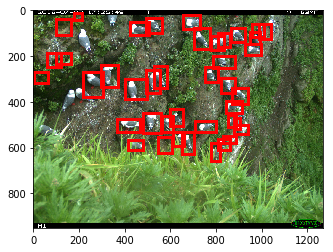

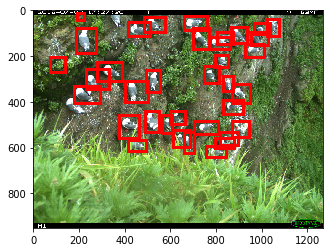

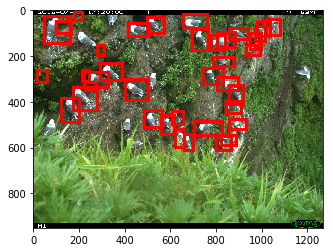

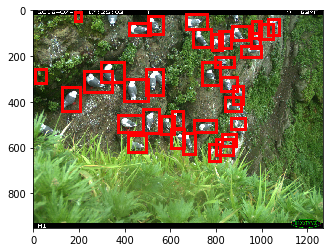

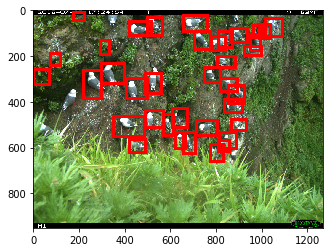

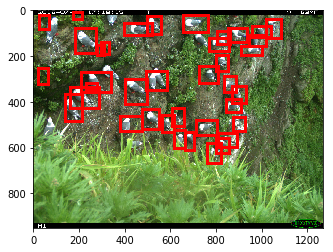

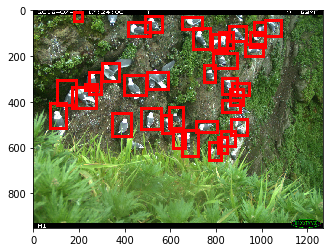

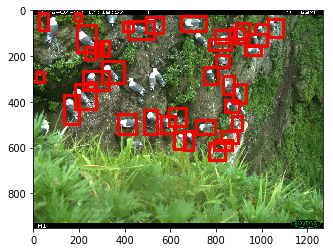

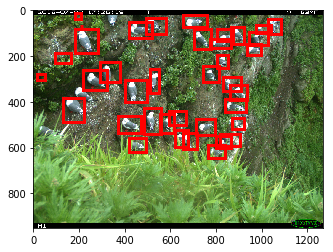

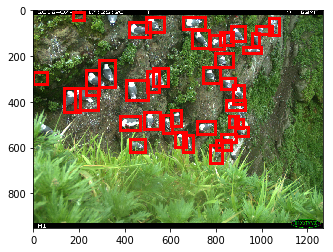

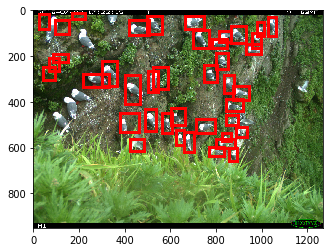

In [56]:
# Visualise rndm images
for i in [5, 16, 24, 25, 131, 141]:
    im, boxes = train_dataset[i]
    im_array = np.moveaxis(np.array(im),-1,0)
    vis_bbox(im_array, boxes)